# Data Import and Autocorrelation for Yellowstone River 
# Daily Discharges for Water Years 2007-2017
## Cameron Carsley
## GEOS 518 - Applied Hydrologic Modeling
## Assignment 1

In this first cell I import Python libraries that I'll need for the analysis and import my .csv file.  I also convert the .csv into a data frame, which makes the data convenient to work with.  The .csv file contains the year, month, day, and average daily discharge of the Yellowstone River, near Livingston, MT, for water years 2007-2017.  I also check the first and last 10 rows to make sure everything imported correctly.

In [3]:
# Cameron Carsley
## Autocorrelation for Yellowstone River Daily Discharges
## GEOS 518 - Applied Hydrologic Modeling
## Assignment 1


### import libraries
import pandas as pd # Required for data management
import numpy as np # Required for some computations
import matplotlib.pyplot as plt # Required for plotting
import scipy
import statsmodels.tsa.api as sm

df = pd.read_csv('YellowstoneRiverQ.csv', names=['Y','M','D','Q'], skiprows=1)     # import discharge .csv

### look at the first 20 rows to make sure data is correctly imported and stored
qrows = np.concatenate([np.arange(0,10,1),np.arange(-11,-1,1)])     # look at first/last 10 rows to check data
df.iloc[qrows,:]    # display first/last 10 rows, all columns

,Y,M,D,Q
0,2007,10,1,34.264634
1,2007,10,2,34.547813
2,2007,10,3,35.397350
3,2007,10,4,36.813243
4,2007,10,5,39.361853
5,2007,10,6,42.476819
6,2007,10,7,45.308607
7,2007,10,8,41.910462
8,2007,10,9,40.777747
9,2007,10,10,40.777747


In this cell I convert year, month, day into serial dates.  I also make a day number for later linear regression.

In [4]:

# set Y,M,D to serial date for plotting
df['SerDates'] = pd.to_datetime(df.Y*10000+df.M*100+df.D,format='%Y%m%d')

# Here's what the first and last 10 records of the modified dataframe looks like
print(df.iloc[qrows,:])   # make sure to_datetime worked


Q = df['Q'].values                    # set Q in dataframe to variable
day_num = np.arange(0,np.size(Q),1)   # set x axis to days since beginning of series


         Y   M   D          Q   SerDates
0     2007  10   1  34.264634 2007-10-01
1     2007  10   2  34.547813 2007-10-02
2     2007  10   3  35.397350 2007-10-03
3     2007  10   4  36.813243 2007-10-04
4     2007  10   5  39.361853 2007-10-05
5     2007  10   6  42.476819 2007-10-06
6     2007  10   7  45.308607 2007-10-07
7     2007  10   8  41.910462 2007-10-08
8     2007  10   9  40.777747 2007-10-09
9     2007  10  10  40.777747 2007-10-10
3673  2017   9  21  81.555493 2017-09-21
3674  2017   9  22  89.201321 2017-09-22
3675  2017   9  23  88.918142 2017-09-23
3676  2017   9  24  86.086354 2017-09-24
3677  2017   9  25  83.820924 2017-09-25
3678  2017   9  26  80.422778 2017-09-26
3679  2017   9  27  79.573242 2017-09-27
3680  2017   9  28  82.688208 2017-09-28
3681  2017   9  29  83.537745 2017-09-29
3682  2017   9  30  83.254566 2017-09-30


In this cell I plot my raw discharge data as a hydrograph.  

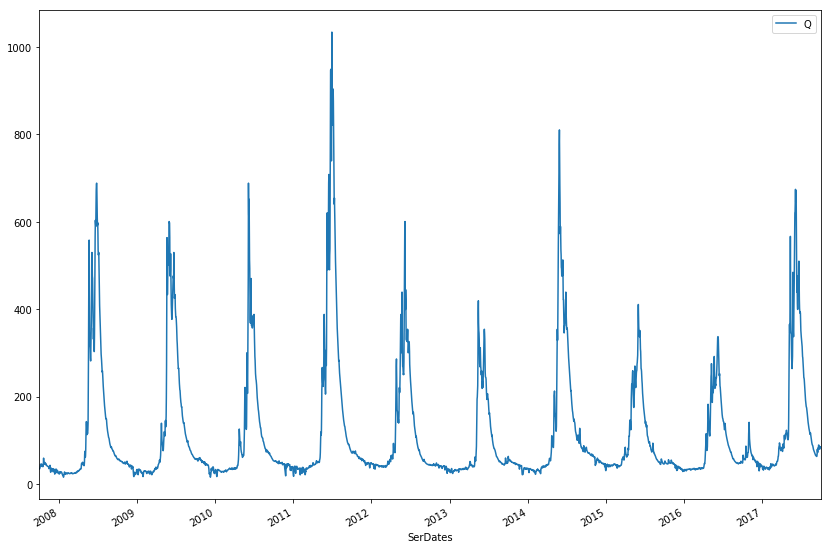

In [43]:
## Plot the data ##

df.plot(x="SerDates", y="Q",figsize=(14,10))
plt.show()


In this cell I autocorrelate and plot discharge data with a one day lag time.  How close is today's discharge with yesterday's?  A one day lag correlates very well with my discharge data (R^2 = 0.99).

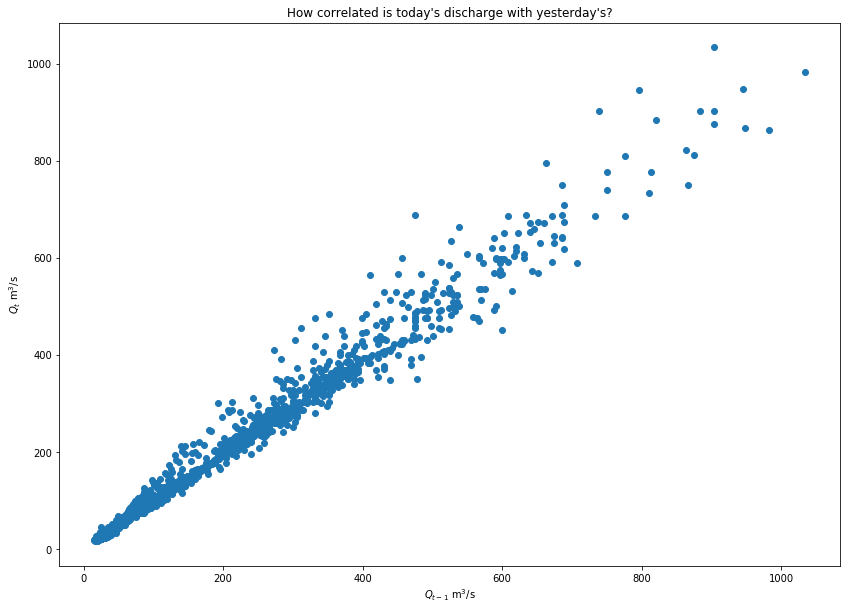

In [8]:
#### How close is today's discharge to yesterday's? --> Autocorrelate data with 1 day difference.

# Use the pandas .values operator to load the values of discharge (the 'Q' column)
# from the pandas dataframe into a numpy array
Q = df['Q'].values 

# Use numpy array indexing to get discharge from October 2, 2000 to September 30, 2015. 
# The 'end' of a numpy array can be indexed using -1: as if the index in the negative direction
# wraps back around to the end of the record.  Array is N-1 in length.
Qt   = Q[1:-1]   # make array of (t+1 to t-1)

# Similarly get discharge from October 1, 2000 to September 29, 2015 by getting data from the 
# beginning of the record to the 'end' minus 1 using the -2 as the index. Array is N-1 in length.
Qtm1 = Q[0:-2]   # make array of (t to t-2 )

# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(14,10))  # make figure large enough to view easily
plt.plot(Qtm1,Qt,'o')       # plot (t+1 to t-1) vs (t to t-2)
plt.title('How correlated is today\'s discharge with yesterday\'s?')
plt.xlabel('$Q_{t-1}$ m$^3$/s')
plt.ylabel('$Q_t$ m$^3$/s')
plt.show()

# save as a 'pickle' file
df.to_pickle('YellowstoneRiverQ_2007-2017.pkl')


In [11]:
## Get statistical correlation ( r squared ) for 1 day lag (t-1, t+1)

R = np.corrcoef(Qtm1, Qt)
R[0,1]

0.99204222971911449

This cell autocorrelates and plots my data with a 40 day lag time.  As you can see the correlation is not as strong (R^2 = 0.37) as it was with the one day lag (R^2 = 0.99).  

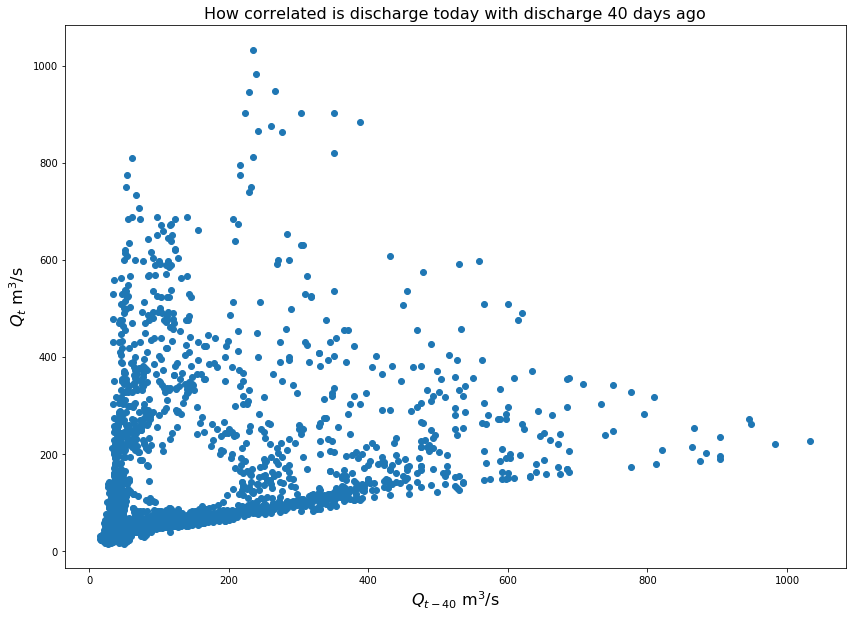

R^2 value of today vs. 40 days ago: 0.368952742483


In [6]:
## How Correlated is Q today with Q 40 days ago?

Qt   = Q[40:-1] # 40 days from now
Qtmk = Q[0:-(41)] # today

# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(14,10))
plt.plot(Qtmk,Qt,'o')
plt.title('How correlated is discharge today with discharge 40 days ago',fontsize=16)
plt.xlabel('$Q_{t-40}$ m$^3$/s',fontsize=16)
plt.ylabel('$Q_t$ m$^3$/s',fontsize=16)
plt.show()

R = np.corrcoef(Qt, Qtmk)
print('R^2 value of today vs. 40 days ago:', R[0,1])

This cell computes correlation coefficients for lag times from 0 to 365 days, with a for loop, and plots the correlation coefficient vs. lag time.  The correlation is initially very good, and decreases with longer lag times until the correlation becomes negative around day 65.  The correlation becomes more negative until it levels out around 365/2 days.  This makes sense that half a year from now the correlation to today's discharge will be the lowest.  The correlation then begins to increase and after a year is around 0.7.  

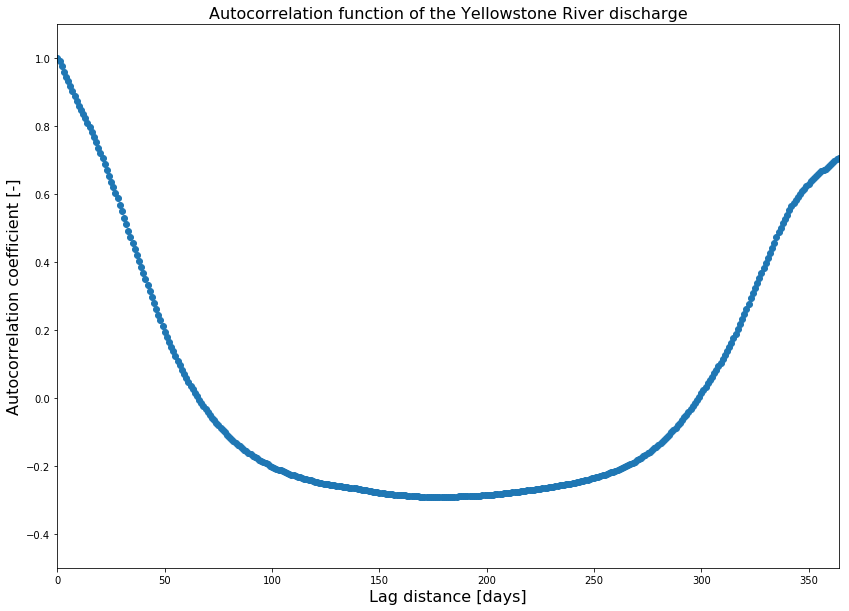

In [9]:
## Get autocorrelation Coefficient for lags from 0 days to 365 days.

Nk = 365                # max lag time (1 year here)
K  = np.arange(0,Nk,1)  # make array of lag times from 0 to max lag
Rk = np.zeros((Nk,1))   # pre-allocation of array for computing efficiency.  
                        # Array is consecutive rather than stored in random locations
                        # pre-allocation is a very good practice, use it!
                        
for k in K:                  # little k is dummy variable (for every element in K), big K is array of length max lag
    Qt   = Q[k:-1]           # for each loop Qt (time+lag) goes from k to end
    Qtmk = Q[0:-(1+k)]       # for each loop Qtmk (time-lag)
    R = np.corrcoef(Qtmk,Qt) # calculate correlation coefficient for each lag
    Rk[k] = R[1,0]           # store correlation coefficient (R^2) for each lag 
  

plt.figure(figsize=(14,10))
plt.plot(K,Rk,'o')
plt.xlim(0.0,np.amax(K.astype(float)))  # make x-axis max of K array (max lag time)
plt.ylim(-0.5 ,1.1)
plt.title('Autocorrelation function of the Yellowstone River discharge',fontsize=16)
plt.xlabel('Lag distance [days]',fontsize=16)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16)
plt.show()

In [1]:
# Pandas autocorrelation 

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Q'])

ModuleNotFoundError: No module named 'pandas.plotting'

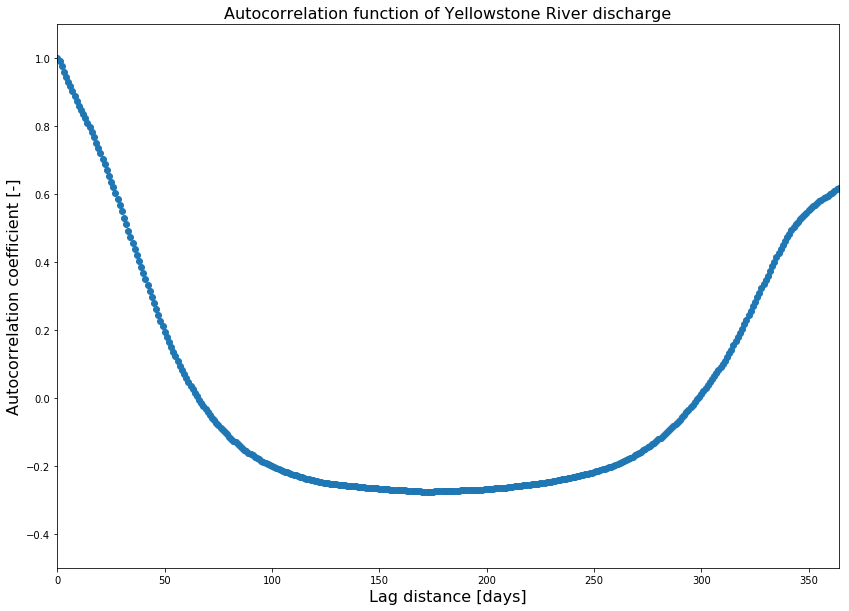

In [12]:
# #7 - Autocorrelattion a slightly different way

Qp = Q - np.mean(Q)      # Normalize the data about the mean

autocovs2 = np.correlate(Qp, Qp, mode='full')    # cross correlation of normalized data

N = autocovs2.size    # get size of array produced by above function

autocovs2_oneside = autocovs2[N//2:]

autocorrs2_oneside = autocovs2_oneside/autocovs2_oneside[0]

plt.figure(figsize=(14,10))
plt.plot(K,autocorrs2_oneside[0:Nk],'o')
plt.ylim(-0.5,1.1)
plt.xlim(0.0,np.amax(K.astype(float)))
plt.title('Autocorrelation function of Yellowstone River discharge',fontsize=16)
plt.xlabel('Lag distance [days]',fontsize=16)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16)
plt.show()

This cell calculates 10 years worth of autocorrelation coefficients.  The autocorrelation is wave-like, and becomes less strong the greater the lag time.  

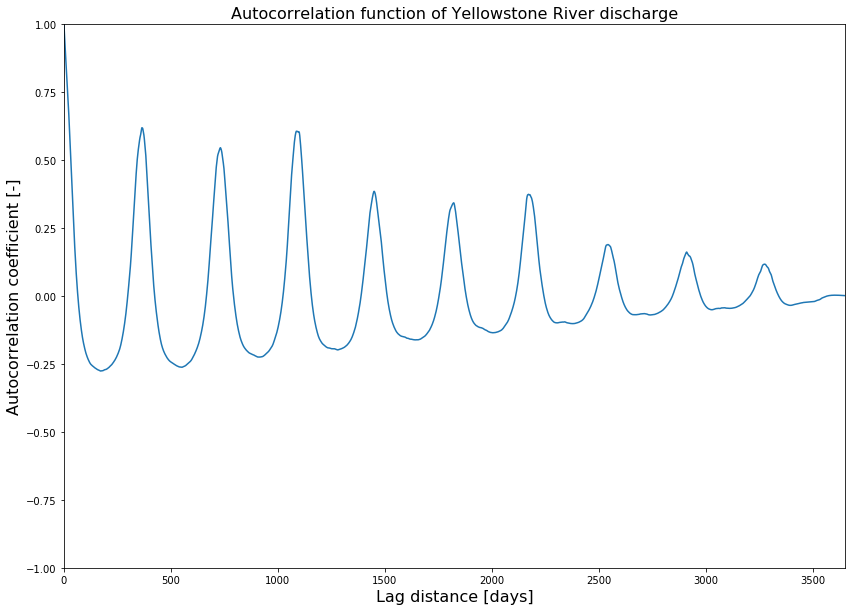

In [13]:
# #8 -  10 years worth of autocorrelation

Nk2 = 365*10              # 10 years of time lag
K2 = np.arange(0,Nk2,1) # make array of 0-10 years with 1 day time step



plt.figure(figsize=(14,10))
plt.plot(K2,autocorrs2_oneside[0:Nk2],'-')
plt.ylim(-1.0,1.0)
plt.xlim(0.0,np.amax(K2.astype(float)))
plt.title('Autocorrelation function of Yellowstone River discharge',fontsize=16)
plt.xlabel('Lag distance [days]',fontsize=16)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16)
plt.show()

This cell calculates key descriptive statistics (mean, variance, standard deviation), and calculates and plots the linear regression of the data.  I also compute and plot a hisogram of the data.  

The slope of the linear regression line (0.00016) indicates wide sense stationarity.  The histogram, which is heavily skewed to the left, may indicate some evidence of stationarity with the great majority of the flows being grouped together.  

The mean discharge of the Yellowstone River (at Livingston, MT) from 2007-2017 is: 114.295143705 m^3/s
The variance in discharges of the Yellowstone River (at Livingston, MT) from 2007-2017 is: 18856.3434878
The Standard Deviation of Yellowstone River Discharges from 2007-2018 is: 137.318401854
                 Y            M            D            Q
count  3684.000000  3684.000000  3684.000000  3684.000000
mean   2012.287731     6.543702    15.725570   114.295144
std       2.925772     3.442715     8.803055   137.337043
min    2007.000000     1.000000     1.000000    15.574834
25%    2010.000000     4.000000     8.000000    39.361853
50%    2012.000000     7.000000    16.000000    53.096024
75%    2015.000000    10.000000    23.000000   118.368737
max    2017.000000    12.000000    31.000000  1033.602606
Linear Regression coefficients are: [slope, y-intercept] [  1.61527718e-04   1.13997690e+02]
The Linear Regression Equation for Yellowstone River Discharges from 2007-2017 is: y = 0.

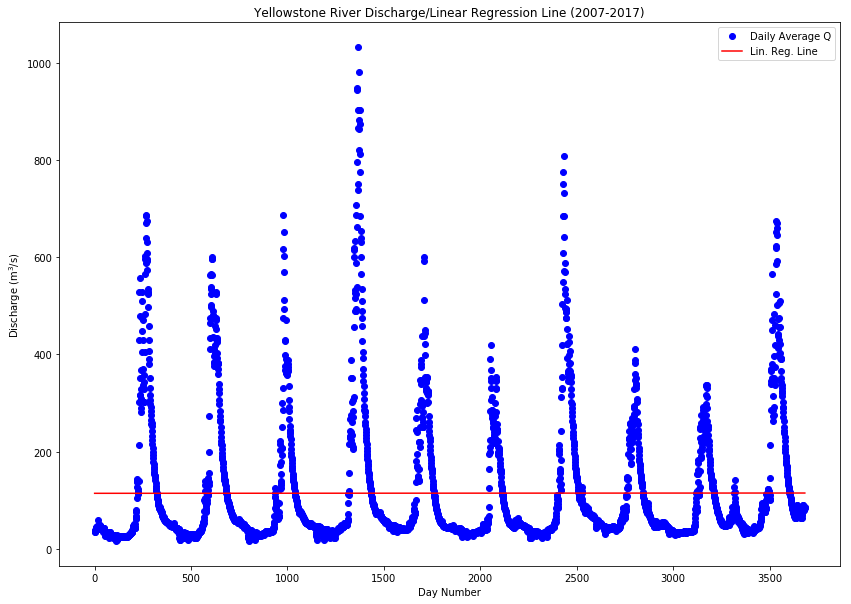

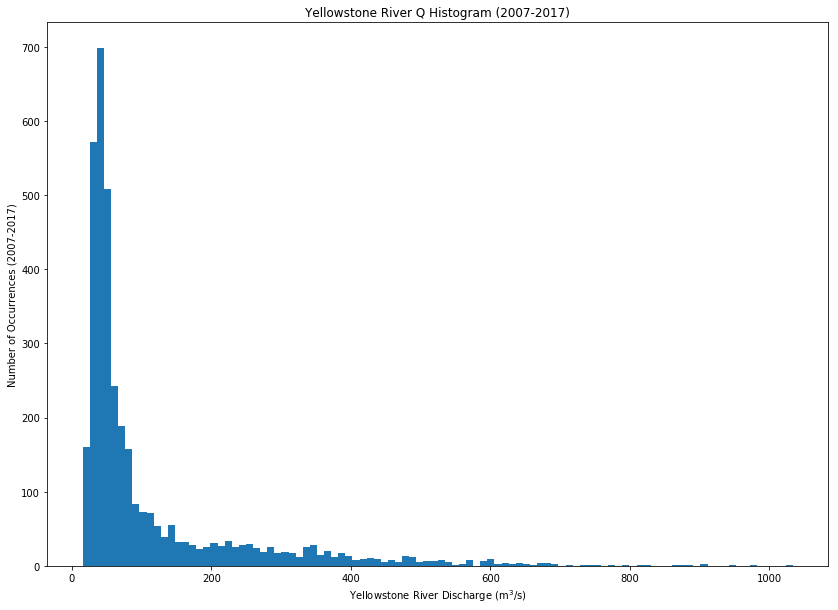

In [16]:
#### Calculate key descriptive statistics ####

mean = np.mean(Q)   # calculate mean discharge
print('The mean discharge of the Yellowstone River (at Livingston, MT) from 2007-2017 is:', mean, 'm^3/s')


var = np.var(Q)   # calculate the variance of discarges
print('The variance in discharges of the Yellowstone River (at Livingston, MT) from 2007-2017 is:', var,)

sd = np.std(Q)     # calculate the standard deviation of the discharges
print('The Standard Deviation of Yellowstone River Discharges from 2007-2018 is:', sd)

stats = df.describe()   # stats function from dataframe
print(stats)

lin_reg = np.polyfit(day_num, Q, 1)  # generate Q vs. day number to linear regression equation
print('Linear Regression coefficients are: [slope, y-intercept]', lin_reg)
print('The Linear Regression Equation for Yellowstone River Discharges from 2007-2017 is: y =', lin_reg[0], 'x +', lin_reg[1])


##### Evaluate Linear Regression in order to plot #####
fit_fn = np.poly1d(lin_reg)      # evaluate linear regression function 

plt.figure(figsize=(14,10))
plt.plot(day_num, Q, 'bo', day_num, fit_fn(day_num), '-r')
plt.title('Yellowstone River Discharge/Linear Regression Line (2007-2017)')
plt.xlabel('Day Number')
plt.ylabel('Discharge (m$^3$/s)')
plt.legend(['Daily Average Q','Lin. Reg. Line'])
plt.show()



plt.figure(figsize=(14,10))
plt.hist(Q, bins='auto')        # plots histogram of data (in one step!)
plt.title('Yellowstone River Q Histogram (2007-2017)')
plt.xlabel('Yellowstone River Discharge (m$^3$/s)')
plt.ylabel('Number of Occurrences (2007-2017)')
plt.show()


This cell performs the Augmented Dickey-Fuller Test.  This result indicates stationarity.

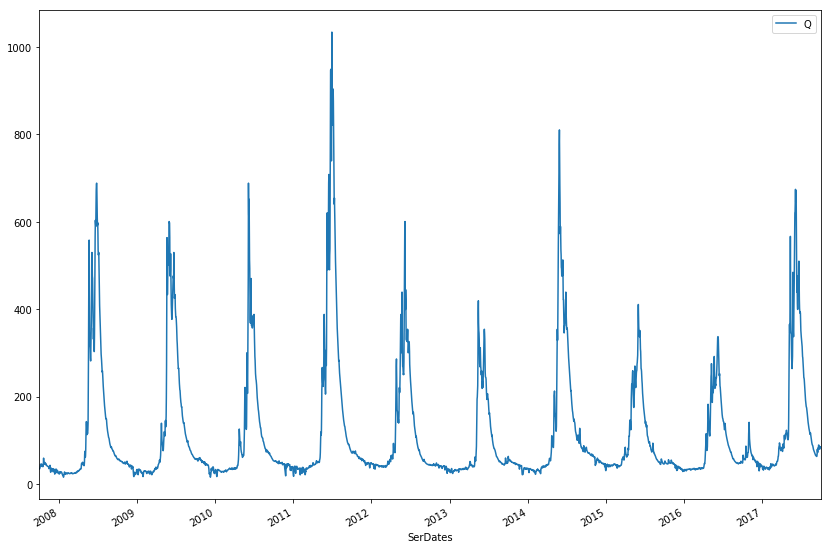

ADF Statistic: -7.057916
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [10]:
## Augmented Dickey-Fuller test ##

from pandas import Series
from statsmodels.tsa.stattools import adfuller

# Q vs. time
df.plot(x="SerDates", y="Q",figsize=(14,10))
plt.show()

ADF_result = adfuller(Q)
print('ADF Statistic: %f' % ADF_result[0])
print('p-value: %f' % ADF_result[1])
print('Critical Values:')
for key, value in ADF_result[4].items():
	print('\t%s: %.3f' % (key, value))

I believe that, based on the slope of the linear regression line, the autocorrelation plots, and the Augmented Dickey-Fuller test, that the discharge of the Yellowstone River near Livingston, MT, is wide sense stationary.  The regression line fit the linear regression line almost exactly, with a slope of 0.00016.  The results of the Augmented Dickey-Fuller test also indicate stationarity (p-value = 0.000000 ?? and ADF Statistic = -7.06.)  
    
I believe that the Yellowstone River, which is naturally controlled, exhibits stationarity in the last 10 years because it is at (dynamic) equilibrium.  We have had wet and dry years in the past 10 years, and the hydrograph depicts that, but overall the river remains quite constant.  The base flows all seem quite consistent, which may be more important to the stationarity than the high flows are.  Base flows are of much longer duration than are the rising limb, peak flow, and falling limb of the hydrograph, so it makes sense that the base flows would carry more weight when describing stationarity.  It appears that winter may be what is keeping the Yellowstone River discharge stationry.  